<a href="https://colab.research.google.com/github/seo-minsu/machine_learning_study-minsu-/blob/main/_4_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80(Logistic_Regression)_minsu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀 (Logistic Regression)

* 로지스틱 회귀는 이름에 회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모델
* 로지스틱 회귀의 예측 함수 정의

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{y} = \sigma(w_0 + w_1 x_1 + ... + w_p x_p)
\end{equation}

  + $\sigma$: 시그모이드 함수
  
* 로지스틱 회귀 모델은 선형 회귀 모델에 시그모이드 함수를 적용

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

## 로지스틱 회귀 예제

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
sns.set_theme(style="whitegrid")

## plt.style.use(['seaborn-whitegrid'])


In [29]:
 from sklearn.datasets import make_classification
 from sklearn.model_selection import train_test_split, cross_val_score
 from sklearn.linear_model import LogisticRegression  ##로지스틱도 선형모델 패키지에서 불러오기

In [26]:
 samples = 1000
 X, y = make_classification(n_samples=samples, n_features=2, ##return, sample 수 = 파라미터 features = 바이너리 수
                           n_informative=2, n_redundant=0,  ##redundant = 노이즈 값
                           n_clusters_per_class=1)

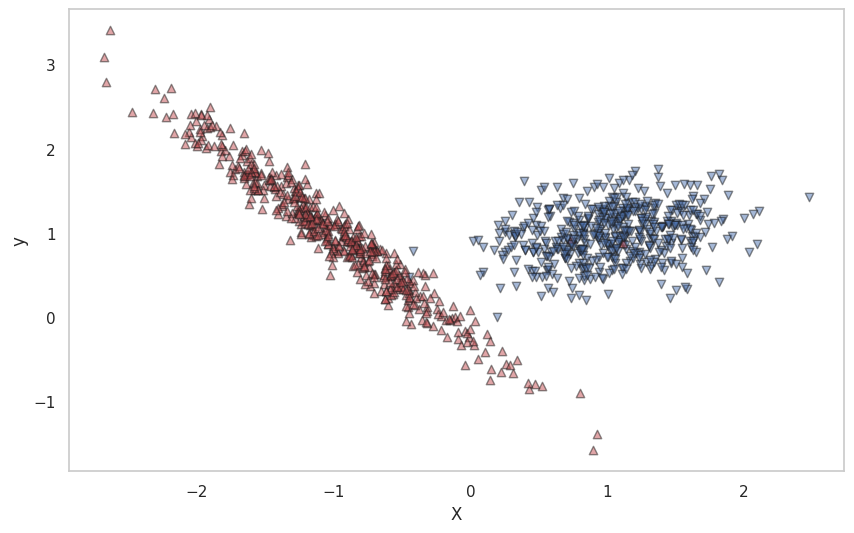

In [30]:
 fig, ax = plt.subplots(1, 1, figsize=(10, 6))
 ax.grid()
 ax.set_xlabel('X')
 ax.set_ylabel('y')
 for i in range(samples):
  if y[i] == 0:
    ax.scatter(X[i, 0], X[i, 1], edgecolors='k', alpha=0.5, marker='^', color='r')
  else:
    ax.scatter(X[i, 0], X[i, 1], edgecolors='k', alpha=0.5, marker='v', color='b')


In [31]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
 model = LogisticRegression()
 model.fit(X_train, y_train)

LogisticRegression()

In [33]:
 print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
 print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9925
평가 데이터 점수: 1.0


In [34]:
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=10)
 print("CV 평균 점수: {}".format(scores.mean()))

CV 평균 점수: 0.994


In [35]:
 model.intercept_, model.coef_

(array([-1.91624431]), array([[5.03850192, 2.71979112]]))

In [36]:
 x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
 y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
 xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

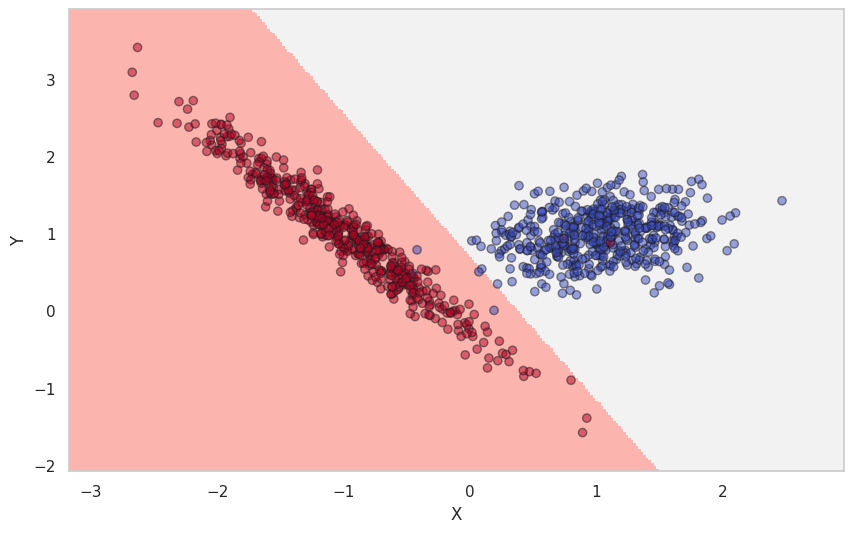

In [39]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)
plt.scatter(X[:, 0], X[:, 1], c=np.abs(y - 1), edgecolors='k', alpha=0.5, cmap=plt.cm.coolwarm)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()
plt.show()

## 붓꽃 데이터

In [40]:
 from sklearn.datasets import load_iris

![iris.png](https://drive.google.com/uc?id=1M-rZSCsgOylvAq82HwPdmn2MikZeDQ9a)

In [41]:
 iris = load_iris()
 print(iris.keys())
 print(iris.DESCR)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= =====

In [43]:
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
species = pd.Series(iris.target, dtype='category')
species = species.cat.rename_categories(iris.target_names)
iris_df['species'] = species

In [44]:
iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


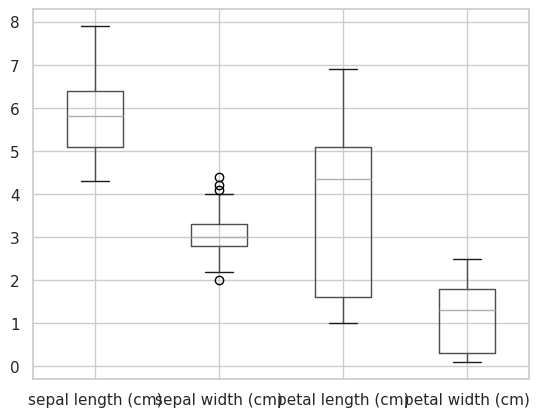

In [45]:
iris_df.boxplot();

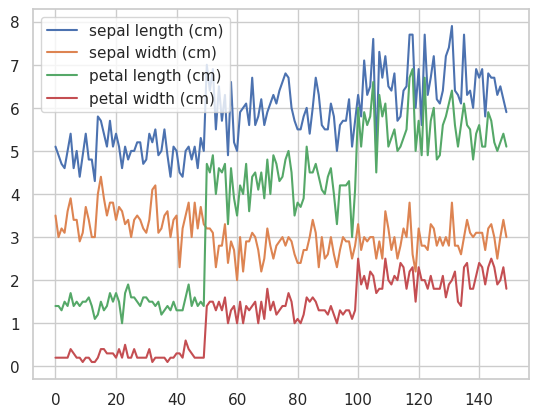

In [46]:
iris_df.plot();

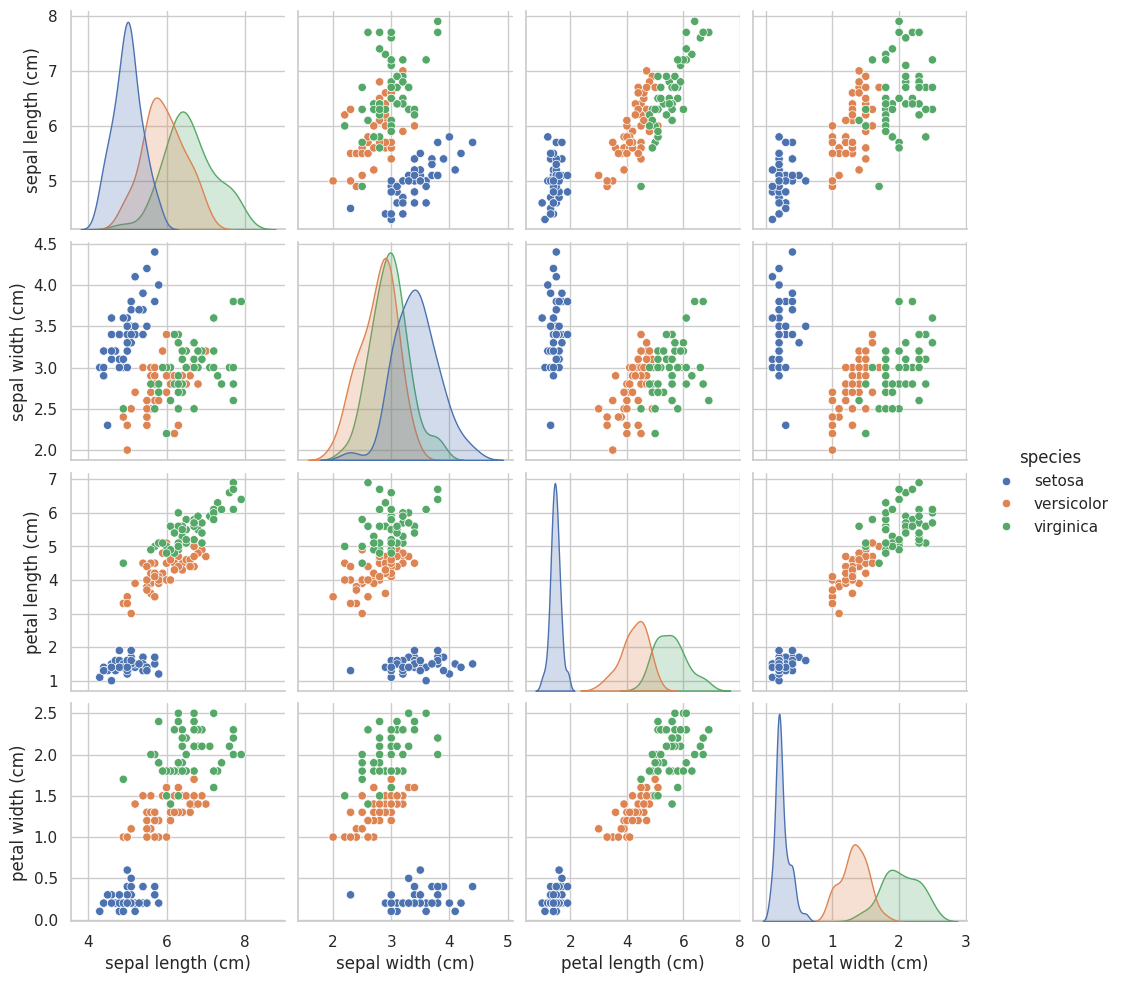

In [47]:
import seaborn as sns
sns.pairplot(iris_df, hue='species');


## 붓꽃 데이터에 대한 로지스틱 회귀

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, [2, 3]], iris.target,
                                                    test_size=0.2, random_state=1, stratify=iris.target)

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', multi_class='auto', C=100.0, random_state=1)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=100.0, multi_class='auto', random_state=1)

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', multi_class='auto', C=100.0, random_state=1)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=100.0, multi_class='auto', random_state=1)

In [56]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9666666666666667
평가 데이터 점수: 0.9666666666666667


In [57]:
import numpy as np
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

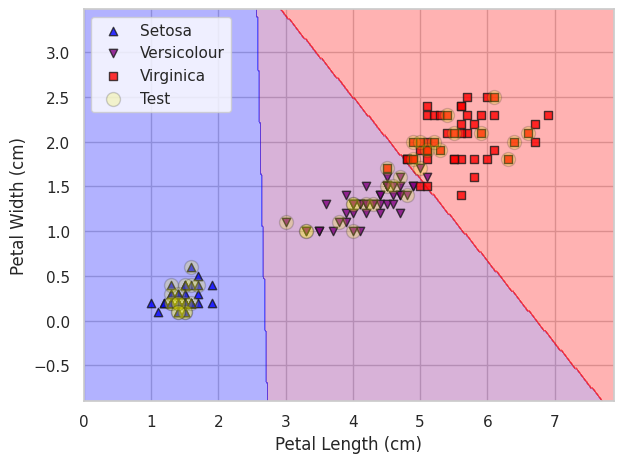

In [58]:
from matplotlib.colors import ListedColormap
x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
species = ('Setosa', 'Versicolour', 'Virginica')
markers = ('^', 'v', 's')
colors = ('blue', 'purple', 'red')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
for idx, cl in enumerate(np.unique(y)):
 plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
             alpha=0.8, c=colors[idx],
             marker=markers[idx], label=species[cl],
             edgecolor='k')
X_comb_test, y_comb_test = X[range(105, 150), :], y[range(105, 150)]
plt.scatter(X_comb_test[:, 0], X_comb_test[:, 1],
           c='yellow', edgecolor='k', alpha=0.2,
           linewidth=1, marker='o',
           s=100, label='Test')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc='upper left')
plt.tight_layout();

In [59]:
import multiprocessing
from sklearn.model_selection import GridSearchCV
param_grid = [{'penalty': ['l1', 'l2'],
               'C': [2.0, 2.2, 2.4, 2.6, 2.8]}]
gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())
gs


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=2,
             param_grid=[{'C': [2.0, 2.2, 2.4, 2.6, 2.8],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [61]:
result = gs.fit(iris.data, iris.target)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

In [62]:
print(gs.best_estimator_)
print("최적 점수: {}".format(gs.best_score_))
print("최적 파라미터: {}".format(gs.best_params_))
pd.DataFrame(result.cv_results_)


LogisticRegression(C=2.4)
최적 점수: 0.9800000000000001
최적 파라미터: {'C': 2.4, 'penalty': 'l2'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000630,0.000121,0.000000,0.000000,2.0,l1,"{'C': 2.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,0.061262,0.017688,0.003403,0.004125,2.0,l2,"{'C': 2.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
2,0.000770,0.000585,0.000000,0.000000,2.2,l1,"{'C': 2.2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,0.062135,0.009939,0.003460,0.002910,2.2,l2,"{'C': 2.2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
4,0.000564,0.000060,0.000000,0.000000,2.4,l1,"{'C': 2.4, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
5,0.050109,0.017605,0.004040,0.003183,2.4,l2,"{'C': 2.4, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
6,0.000490,0.000044,0.000000,0.000000,2.6,l1,"{'C': 2.6, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
7,0.072264,0.029860,0.003961,0.003011,2.6,l2,"{'C': 2.6, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
8,0.000521,0.000059,0.000000,0.000000,2.8,l1,"{'C': 2.8, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
9,0.042120,0.016018,0.001636,0.000197,2.8,l2,"{'C': 2.8, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1


## 유방암 데이터

## 유방암 데이터에 대한 로지스틱 회귀

# 확률적 경사 하강법 (Stochastic Gradient Descent)

* 모델을 학습 시키기 위한 간단한 방법
* 학습 파라미터에 대한 손실 함수의 기울기를 구해 기울기가 최소화 되는 방향으로 학습

\begin{equation}
\frac{\partial L}{\partial w} = \underset{h \rightarrow 0}{lim} \frac{L(w+h) - L(w)}{h} \\
w^{'} = w - \alpha \frac{\partial L}{\partial w}
\end{equation}

* scikit-learn에서는 선형 SGD 회귀와 SGD 분류를 지원

## SGD를 사용한 선형 회귀 분석

## 붓꽃 데이터에 대한 SGD 분류

## 유방암 데이터에 대한 SGD 분류